In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt

In [102]:
data_d = r"heart_attack_south_africa.csv"


In [103]:
df = pd.read_csv(data_d)

In [104]:
df

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,1,76,Female,156,94,79,No,High,Sedentary,35.2,No,No,Good,High,No,No,264,141,65,0
1,2,39,Female,160,185,88,No,Low,Sedentary,21.3,No,No,Average,Medium,No,Yes,150,81,42,0
2,3,85,Male,254,173,113,Yes,Moderate,Highly Active,32.0,Yes,No,Good,Low,No,No,220,124,70,1
3,4,45,Female,261,187,65,No,High,Sedentary,36.4,No,Yes,Average,Low,No,Yes,141,56,38,1
4,5,48,Male,206,189,84,No,Low,Active,26.6,No,No,Good,High,No,No,221,186,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,55,Female,187,159,88,Yes,Moderate,Sedentary,32.9,No,No,Average,High,No,Yes,225,158,48,1
99996,99997,84,Male,172,169,86,Yes,Low,Active,24.0,No,No,Poor,Medium,No,No,159,110,24,1
99997,99998,67,Female,299,134,90,No,Low,Active,32.4,Yes,Yes,Average,Low,Yes,No,219,141,22,1
99998,99999,33,Male,221,160,99,No,High,Active,39.1,No,Yes,Average,High,No,Yes,131,191,61,1


In [105]:
df.isna().sum() #checking missing values.

Patient_ID                      0
Age                             0
Gender                          0
Cholesterol_Level               0
Blood_Pressure_Systolic         0
Blood_Pressure_Diastolic        0
Smoking_Status                  0
Alcohol_Intake                  0
Physical_Activity               0
Obesity_Index                   0
Diabetes_Status                 0
Family_History_Heart_Disease    0
Diet_Quality                    0
Stress_Level                    0
Heart_Attack_History            0
Medication_Usage                0
Triglycerides_Level             0
LDL_Level                       0
HDL_Level                       0
Heart_Attack_Outcome            0
dtype: int64

In [106]:
#total count of patients :-

In [107]:
print("Total_patients",len(df))

Total_patients 100000


In [108]:
#Counting patients by gender

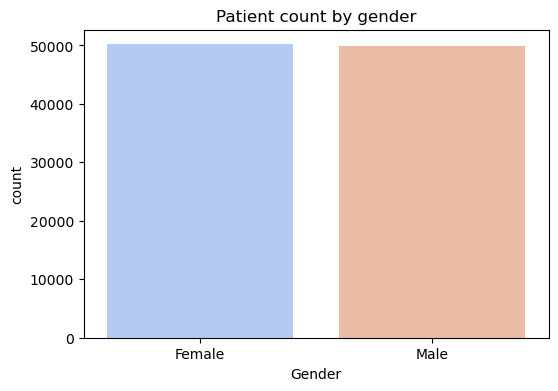

In [109]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Gender',palette='coolwarm')
plt.title("Patient count by gender")
plt.show()

In [110]:
# Age distribution and heart attack by age

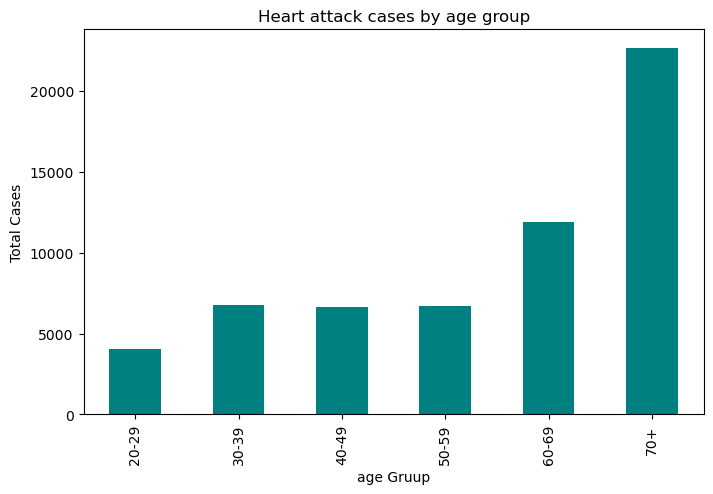

In [111]:
df['Age_group']= pd.cut(df['Age'],bins=[20,30,40,50,60,70,100],
                        labels=
                      [ "20-29","30-39","40-49","50-59","60-69","70+"])
age_group_counts = df.groupby("Age_group")['Heart_Attack_Outcome'].sum()
plt.figure(figsize=(8,5))
age_group_counts.plot(kind='bar',color='teal')
plt.title("Heart attack cases by age group")
plt.xlabel('age Gruup')
plt.ylabel("Total Cases")
plt.show()

In [112]:
#Line Chart showing the percentage of heart attack cases across different age groups

In [113]:
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

In [114]:
# Group by age group and calculate heart attack percentage
age_heart_attack = df.groupby('Age_Group')['Heart_Attack_Outcome'].mean() * 100  # Convert to percentage


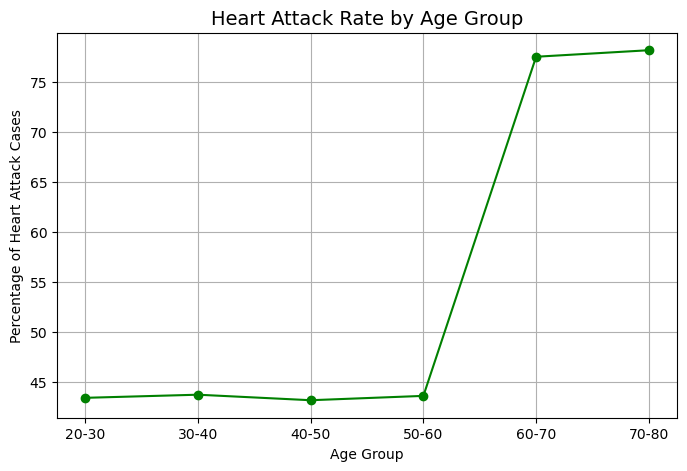

In [115]:
# Plot line chart
plt.figure(figsize=(8,5))
plt.plot(age_heart_attack.index, age_heart_attack.values, marker='o', linestyle='-', color='green')
plt.title('Heart Attack Rate by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Percentage of Heart Attack Cases')

plt.grid(True)
plt.show()


In [116]:
#Showing heart attack rate according do Obesity inndex

In [117]:
df['Obesity_Level'] = pd.cut(df['Obesity_Index'], bins=[10, 20, 25, 30, 35, 40, 50], 
                             labels=['10-19', '20-24', '25-29', '30-34', '35-39', '40+'])


In [118]:
obesity_trend = df.groupby('Obesity_Level')['Heart_Attack_Outcome'].mean() * 100

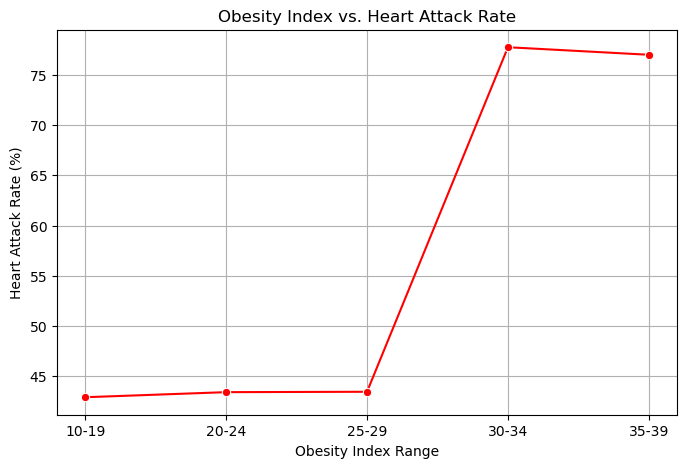

In [119]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=obesity_trend.index, y=obesity_trend.values, marker='o', linestyle='-', color='r')
plt.xlabel("Obesity Index Range")
plt.ylabel("Heart Attack Rate (%)")
plt.title("Obesity Index vs. Heart Attack Rate")
plt.grid(True)
plt.show()

In [120]:
print("average Calestrol Level:",df['Cholesterol_Level'].mean())

average Calestrol Level: 224.57874


In [121]:
#Heart attack outcome according ot alcohole intake

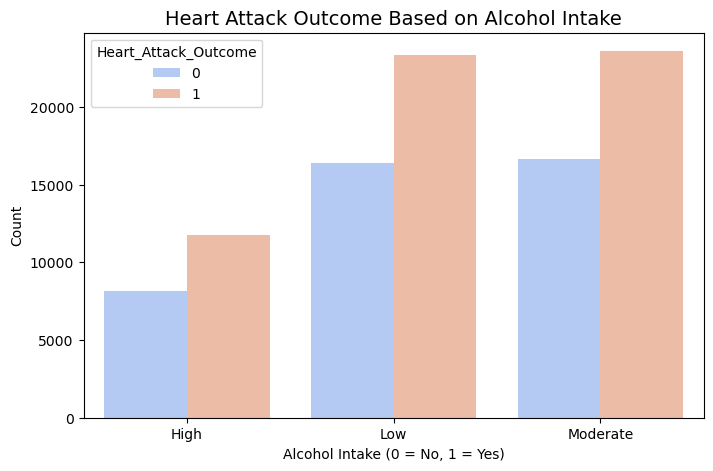

In [122]:
plt.figure(figsize=(8,5))
sns.countplot(x='Alcohol_Intake', hue='Heart_Attack_Outcome', data=df, palette='coolwarm')
plt.title('Heart Attack Outcome Based on Alcohol Intake', fontsize=14)
plt.xlabel('Alcohol Intake (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [123]:
#smoking & heart attack risks

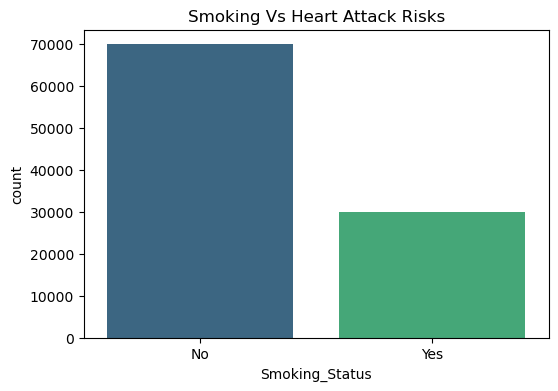

In [124]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Smoking_Status', palette='viridis')

plt.title("Smoking Vs Heart Attack Risks")
plt.show()

In [125]:
#different level of diet quality for undertanding patients diet quality.

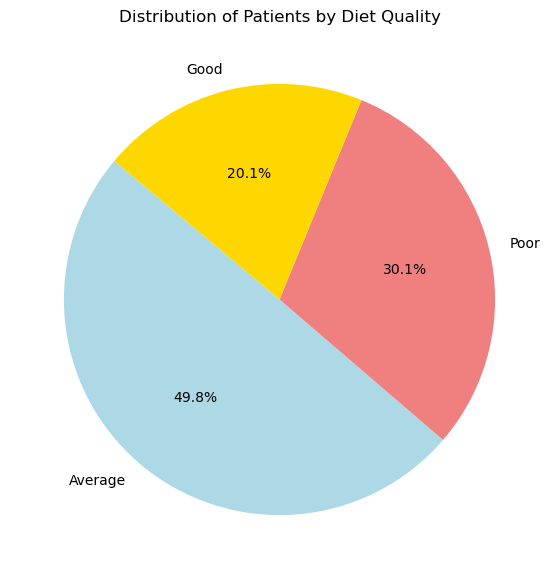

In [126]:
# Count total patients per Diet Quality level
diet_distribution = df['Diet_Quality'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(diet_distribution, labels=diet_distribution.index, autopct='%1.1f%%', 
        colors=['lightblue', 'lightcoral', 'gold', 'lightgreen'], startangle=140)
plt.title("Distribution of Patients by Diet Quality")
plt.show()


In [127]:
#Checking Obesity index who have heart attack vs who doesn't have heart attack

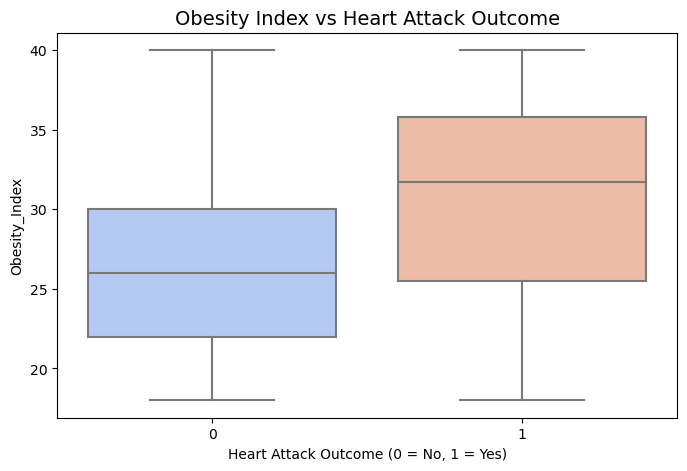

In [128]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Heart_Attack_Outcome'], y=df['Obesity_Index'], palette="coolwarm")
plt.title('Obesity Index vs Heart Attack Outcome', fontsize=14)
plt.xlabel('Heart Attack Outcome (0 = No, 1 = Yes)')
plt.ylabel('Obesity_Index')
plt.show()

In [129]:
#Blood pressure analysis

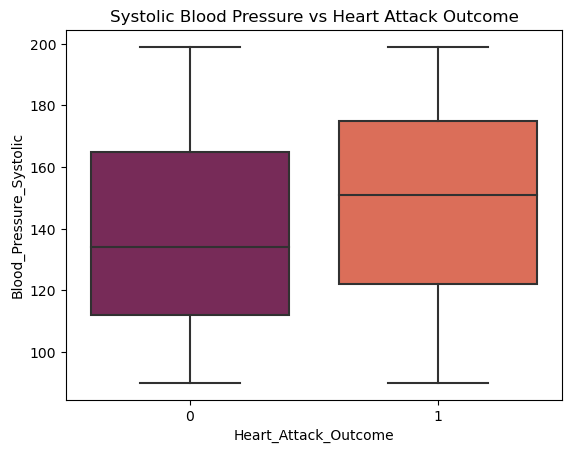

In [130]:
sns.boxplot(data=df, x='Heart_Attack_Outcome', y='Blood_Pressure_Systolic', palette='rocket')
plt.title("Systolic Blood Pressure vs Heart Attack Outcome")
plt.show()

In [131]:
# Conclusion: Insights from the Visuals

In [132]:
print("\nKey Findings:")
print("1. Older age groups have higher heart attack cases.")
print("2. Smokers & diabetic patients have a higher heart attack risk.")
print("3. High obesity and high blood pressure are strong risk factors.")


Key Findings:
1. Older age groups have higher heart attack cases.
2. Smokers & diabetic patients have a higher heart attack risk.
3. High obesity and high blood pressure are strong risk factors.
